In [1]:
import pandas as pd 
import numpy as np 
from itertools import combinations
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_context('talk')
import scipy.stats as stats
sns.set(style="ticks")

plt.style.use('ggplot')

Note : Data is available from January 1973 to September 2019

In [2]:
df = pd.read_csv('Electricity Consumption.csv')
df

,DATE,Electricty_Consumption_in_TW
0,1/1/1973,35.9728
1,2/1/1973,36.1334
2,3/1/1973,35.0625
3,4/1/1973,33.8416
4,5/1/1973,33.5107
...,...,...
556,5/1/2019,97.5860
557,6/1/2019,110.8580
558,7/1/2019,122.1014
559,8/1/2019,121.7765


In [3]:
df["time"] = pd.to_datetime(df["DATE"], format='%m/%d/%Y', errors='coerce')

In [4]:
df.drop(columns='DATE', inplace=True)

In [5]:
df.set_index("time", inplace=True)

In [5]:

df["Month"] = df["time"].dt.month
df["Year"] = df["time"].dt.year
df["Day"] = df["time"].dt.day

In [12]:
df

,Electricty_Consumption_in_TW,Month,Year,Day
time,,,,
1973-01-01,35.9728,1,1973,1
1973-02-01,36.1334,2,1973,1
1973-03-01,35.0625,3,1973,1
1973-04-01,33.8416,4,1973,1
1973-05-01,33.5107,5,1973,1
...,...,...,...,...
2019-05-01,97.5860,5,2019,1
2019-06-01,110.8580,6,2019,1
2019-07-01,122.1014,7,2019,1


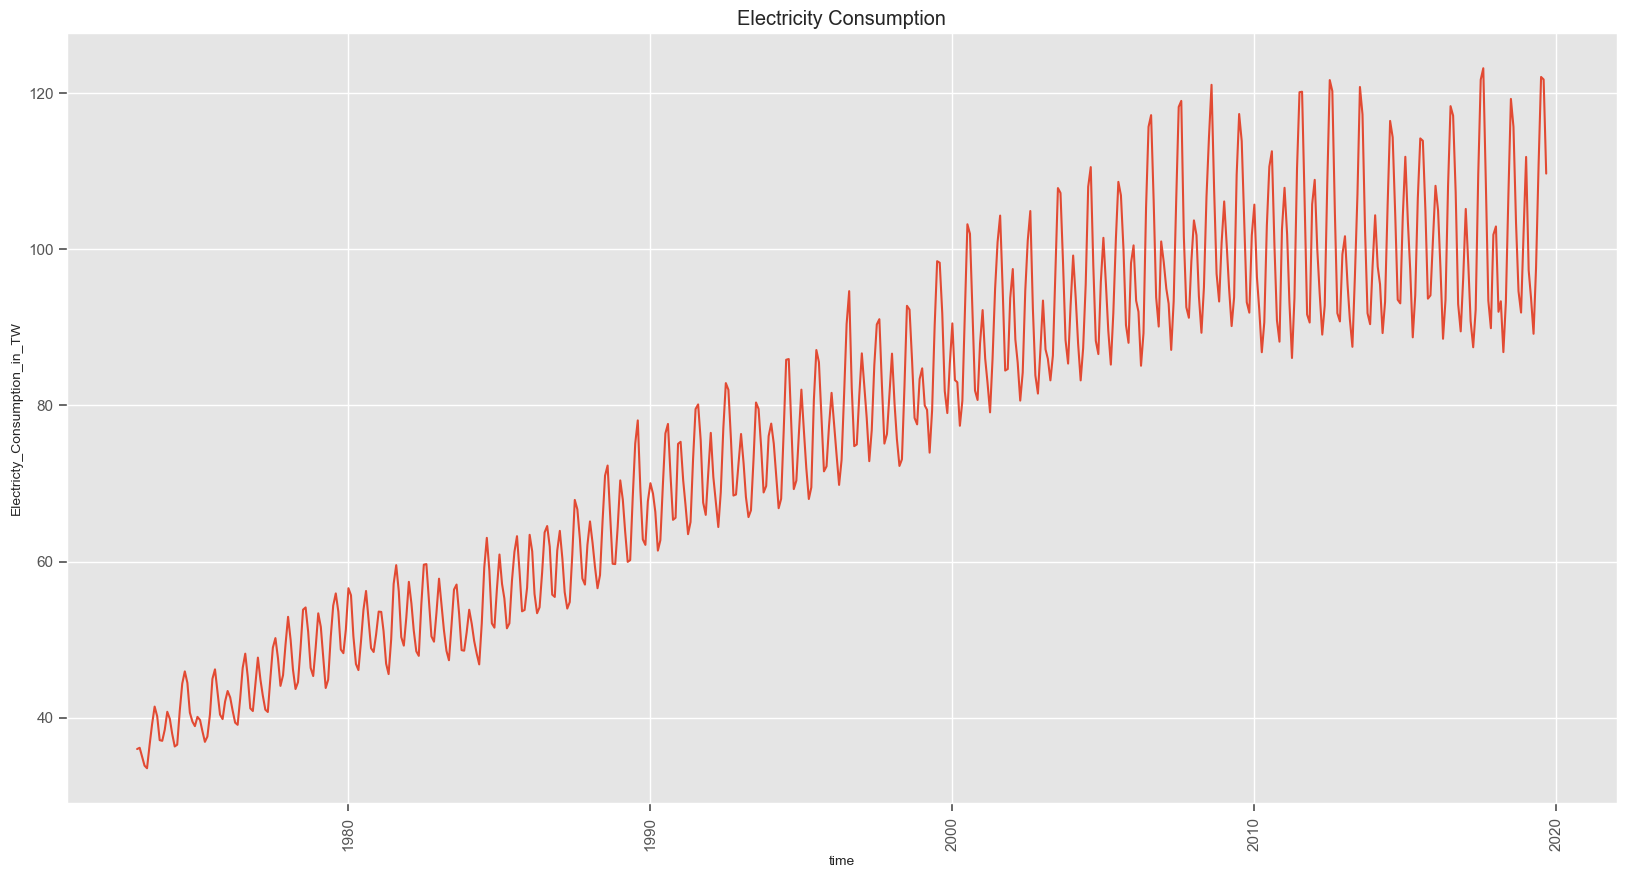

In [185]:
Time=df.groupby(['time']).Electricty_Consumption_in_TW.sum().reset_index()
Time.index = Time.index.astype(str)
plt.figure(figsize=(20,10))
sns.lineplot(data=Time,x='time',y='Electricty_Consumption_in_TW')
plt.ticklabel_format(style='plain',axis='y')
plt.title('Electricity Consumption')
plt.show()

In [7]:
df["lag(1)"] = df["Electricty_Consumption_in_TW"].shift(1)
df["lag(2)"] = df["Electricty_Consumption_in_TW"].shift(2)
df["lead(1)"] = df["Electricty_Consumption_in_TW"].shift(-1)
df["diff1"] = df["Electricty_Consumption_in_TW"]- df["lag(1)"]
df

,Electricty_Consumption_in_TW,Month,Year,Day,lag(1),lag(2),lead(1),diff1
time,,,,,,,,
1973-01-01,35.9728,1,1973,1,NaN,NaN,36.1334,NaN
1973-02-01,36.1334,2,1973,1,35.9728,NaN,35.0625,0.1606
1973-03-01,35.0625,3,1973,1,36.1334,35.9728,33.8416,-1.0709
1973-04-01,33.8416,4,1973,1,35.0625,36.1334,33.5107,-1.2209
1973-05-01,33.5107,5,1973,1,33.8416,35.0625,36.4823,-0.3309
...,...,...,...,...,...,...,...,...
2019-05-01,97.5860,5,2019,1,89.1873,93.8406,110.8580,8.3987
2019-06-01,110.8580,6,2019,1,97.5860,89.1873,122.1014,13.2720
2019-07-01,122.1014,7,2019,1,110.8580,97.5860,121.7765,11.2434


In [9]:
df["RollingAverage(2)"]  =  df["Electricty_Consumption_in_TW"].rolling(2).mean()
df["RollingAverage(3)"]  =  df["Electricty_Consumption_in_TW"].rolling(3).mean()
df["RollingAverage(4)"]  =  df["Electricty_Consumption_in_TW"].rolling(4).mean()

df

,Electricty_Consumption_in_TW,Month,Year,Day,lag(1),lag(2),lead(1),diff1,RollingAverage(2),RollingAverage(3),RollingAverage(4)
time,,,,,,,,,,,
1973-01-01,35.9728,1,1973,1,NaN,NaN,36.1334,NaN,NaN,NaN,NaN
1973-02-01,36.1334,2,1973,1,35.9728,NaN,35.0625,0.1606,36.05310,NaN,NaN
1973-03-01,35.0625,3,1973,1,36.1334,35.9728,33.8416,-1.0709,35.59795,35.722900,NaN
1973-04-01,33.8416,4,1973,1,35.0625,36.1334,33.5107,-1.2209,34.45205,35.012500,35.252575
1973-05-01,33.5107,5,1973,1,33.8416,35.0625,36.4823,-0.3309,33.67615,34.138267,34.637050
...,...,...,...,...,...,...,...,...,...,...,...
2019-05-01,97.5860,5,2019,1,89.1873,93.8406,110.8580,8.3987,93.38665,93.537967,94.485000
2019-06-01,110.8580,6,2019,1,97.5860,89.1873,122.1014,13.2720,104.22200,99.210433,97.867975
2019-07-01,122.1014,7,2019,1,110.8580,97.5860,121.7765,11.2434,116.47970,110.181800,104.933175


In [10]:
#Exponential Moving Average
df["Electricty_Consumption_in_TW EMA"] =   df["Electricty_Consumption_in_TW"].ewm(alpha = 0.2, adjust=False).mean()
df

,Electricty_Consumption_in_TW,Month,Year,Day,lag(1),lag(2),lead(1),diff1,RollingAverage(2),RollingAverage(3),RollingAverage(4),Electricty_Consumption_in_TW EMA
time,,,,,,,,,,,,
1973-01-01,35.9728,1,1973,1,NaN,NaN,36.1334,NaN,NaN,NaN,NaN,35.972800
1973-02-01,36.1334,2,1973,1,35.9728,NaN,35.0625,0.1606,36.05310,NaN,NaN,36.004920
1973-03-01,35.0625,3,1973,1,36.1334,35.9728,33.8416,-1.0709,35.59795,35.722900,NaN,35.816436
1973-04-01,33.8416,4,1973,1,35.0625,36.1334,33.5107,-1.2209,34.45205,35.012500,35.252575,35.421469
1973-05-01,33.5107,5,1973,1,33.8416,35.0625,36.4823,-0.3309,33.67615,34.138267,34.637050,35.039315
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-01,97.5860,5,2019,1,89.1873,93.8406,110.8580,8.3987,93.38665,93.537967,94.485000,97.951639
2019-06-01,110.8580,6,2019,1,97.5860,89.1873,122.1014,13.2720,104.22200,99.210433,97.867975,100.532911
2019-07-01,122.1014,7,2019,1,110.8580,97.5860,121.7765,11.2434,116.47970,110.181800,104.933175,104.846609


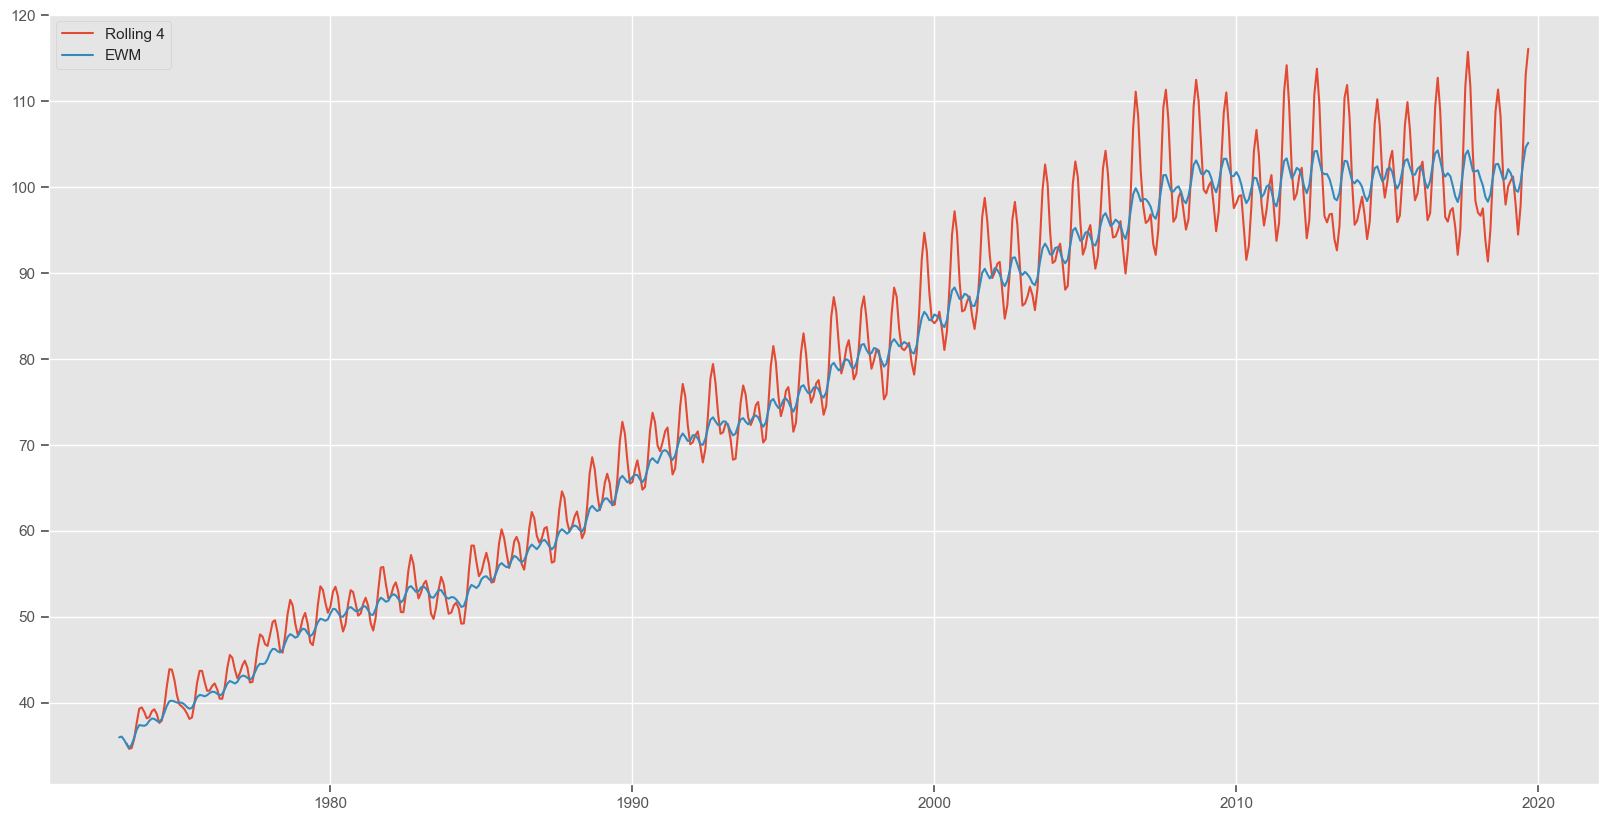

In [11]:
#Measuring the exponential moving average to decrease the weight
plt.figure(figsize=(20,10))
#plt.plot(df["Electricty_Consumption_in_TW"],label = "Actual")
#plt.plot(df["RollingAverage(2)"],label = "Rolling 2")
#plt.plot(df["RollingAverage(3)"], label = "Rolling 3")
plt.plot(df["RollingAverage(4)"], label = "Rolling 4")
plt.plot(df["Electricty_Consumption_in_TW"].ewm(alpha = 0.1).mean(), label = "EWM")  #exponentially moving average

plt.legend()

In [12]:
#Centered Moving Average
window_size = 3
df['CMA'] = df['Electricty_Consumption_in_TW'].rolling(window=window_size, center=True).mean()

In [13]:
df

,Electricty_Consumption_in_TW,Month,Year,Day,lag(1),lag(2),lead(1),diff1,RollingAverage(2),RollingAverage(3),RollingAverage(4),Electricty_Consumption_in_TW EMA,CMA
time,,,,,,,,,,,,,
1973-01-01,35.9728,1,1973,1,NaN,NaN,36.1334,NaN,NaN,NaN,NaN,35.972800,NaN
1973-02-01,36.1334,2,1973,1,35.9728,NaN,35.0625,0.1606,36.05310,NaN,NaN,36.004920,35.722900
1973-03-01,35.0625,3,1973,1,36.1334,35.9728,33.8416,-1.0709,35.59795,35.722900,NaN,35.816436,35.012500
1973-04-01,33.8416,4,1973,1,35.0625,36.1334,33.5107,-1.2209,34.45205,35.012500,35.252575,35.421469,34.138267
1973-05-01,33.5107,5,1973,1,33.8416,35.0625,36.4823,-0.3309,33.67615,34.138267,34.637050,35.039315,34.611533
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-01,97.5860,5,2019,1,89.1873,93.8406,110.8580,8.3987,93.38665,93.537967,94.485000,97.951639,99.210433
2019-06-01,110.8580,6,2019,1,97.5860,89.1873,122.1014,13.2720,104.22200,99.210433,97.867975,100.532911,110.181800
2019-07-01,122.1014,7,2019,1,110.8580,97.5860,121.7765,11.2434,116.47970,110.181800,104.933175,104.846609,118.245300


# EDA

Electrcity Consumption over the months

<Axes: xlabel='Month', ylabel='Electricty_Consumption_in_TW'>

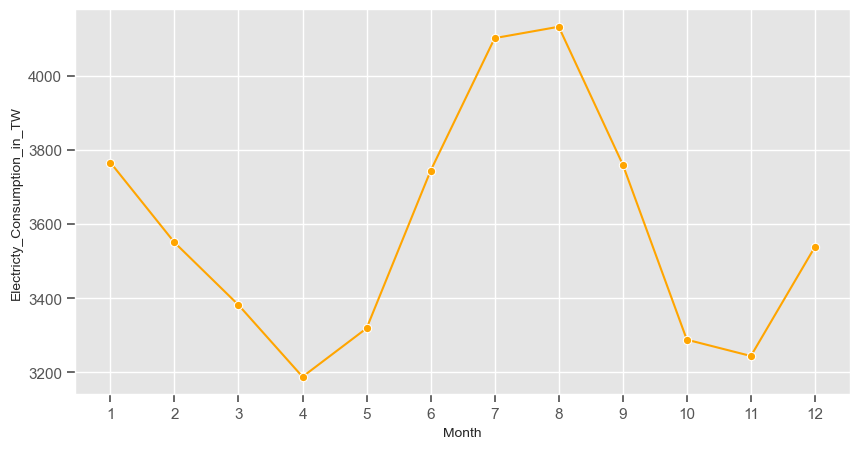

In [91]:
day = pd.pivot_table(data = df, index = 'Month', values = 'Electricty_Consumption_in_TW', aggfunc='sum')
day.index = day.index.astype(str)
plt.figure(figsize=(10,5))
sns.lineplot(data=day,x='Month',y='Electricty_Consumption_in_TW',color='orange', marker='o')


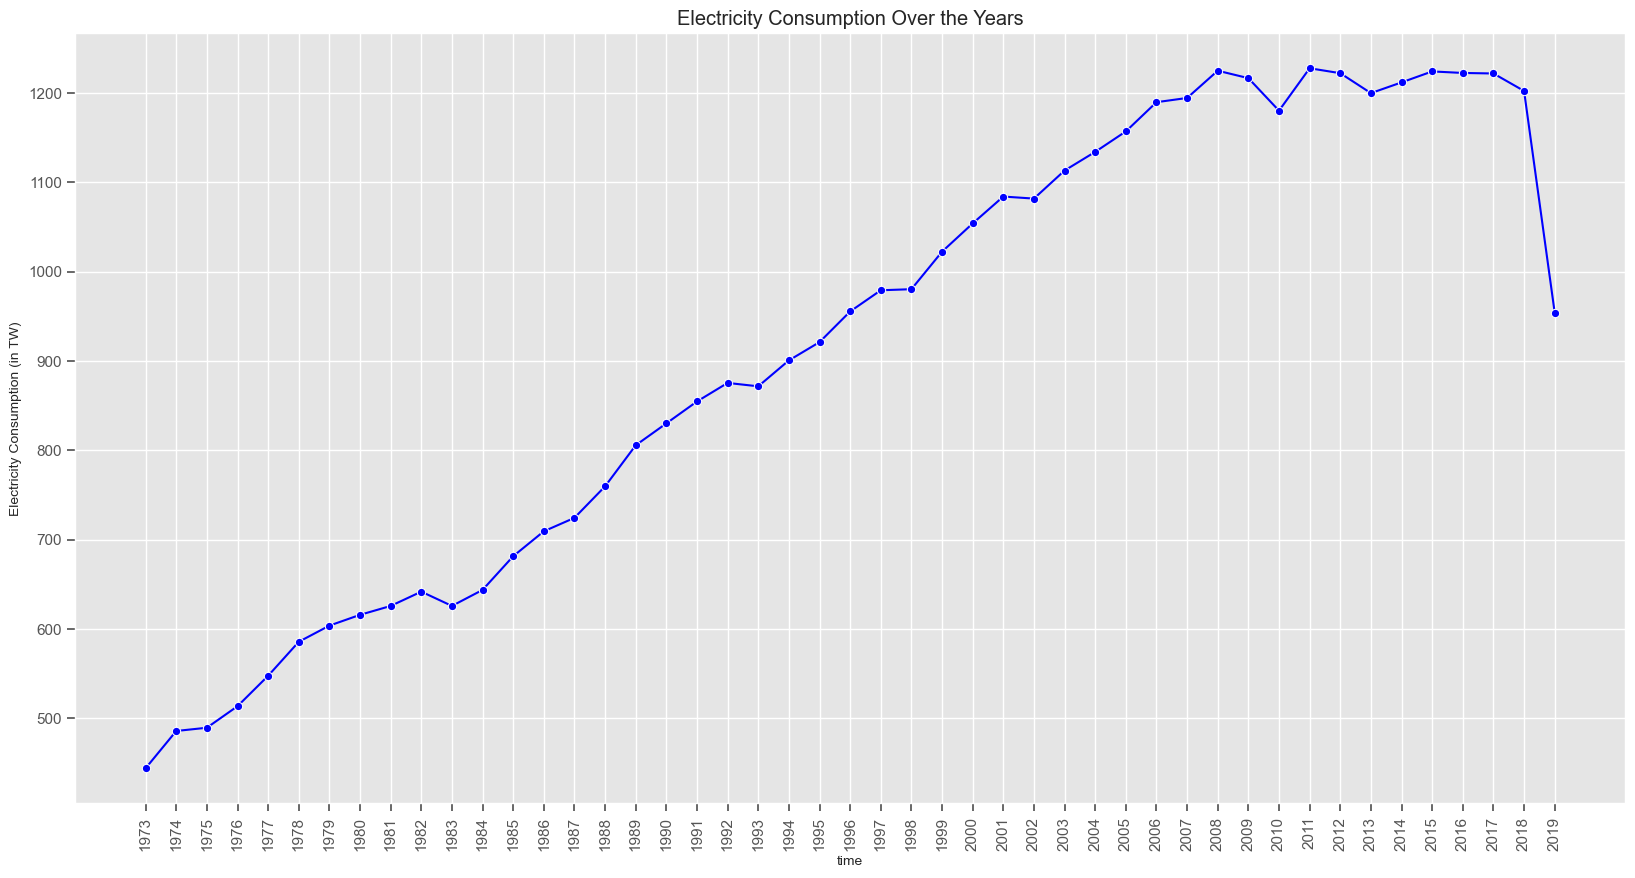

In [150]:
#Electrcity Consumption year-wise
El_consumption = df.pivot_table(values='Electricty_Consumption_in_TW', index='Year', aggfunc='sum')

# Converting 'Year' index to strings
El_consumption.index = El_consumption.index.astype(str)
plt.figure(figsize=(20,10))
# Plot
sns.lineplot(data=El_consumption,x='Year',y='Electricty_Consumption_in_TW',color='blue', marker = 'o')
plt.ticklabel_format(style='plain',axis='y')
plt.xlabel('time')
plt.ylabel('Electricity Consumption (in TW)')
plt.title('Electricity Consumption Over the Years')
plt.xticks(rotation=90)
plt.grid(True)
#plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

Electricity consumption over time with respect to change in months (Seaborn)

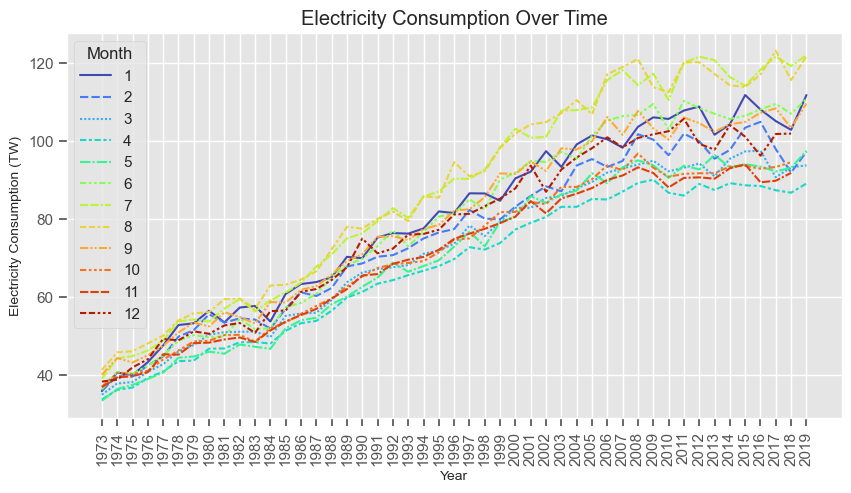

In [154]:
time_period = pd.pivot_table(data=df, index='Year', columns='Month', values='Electricty_Consumption_in_TW', aggfunc='sum')

time_period.index = time_period.index.astype(str)

plt.figure(figsize=(10, 5))
sns.lineplot(data=time_period, palette='turbo')#markers= 'o'
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Electricity Consumption (TW)')
plt.title('Electricity Consumption Over Time')
plt.show()


Electricity consumption over time with respect to change in years (Seaborn)

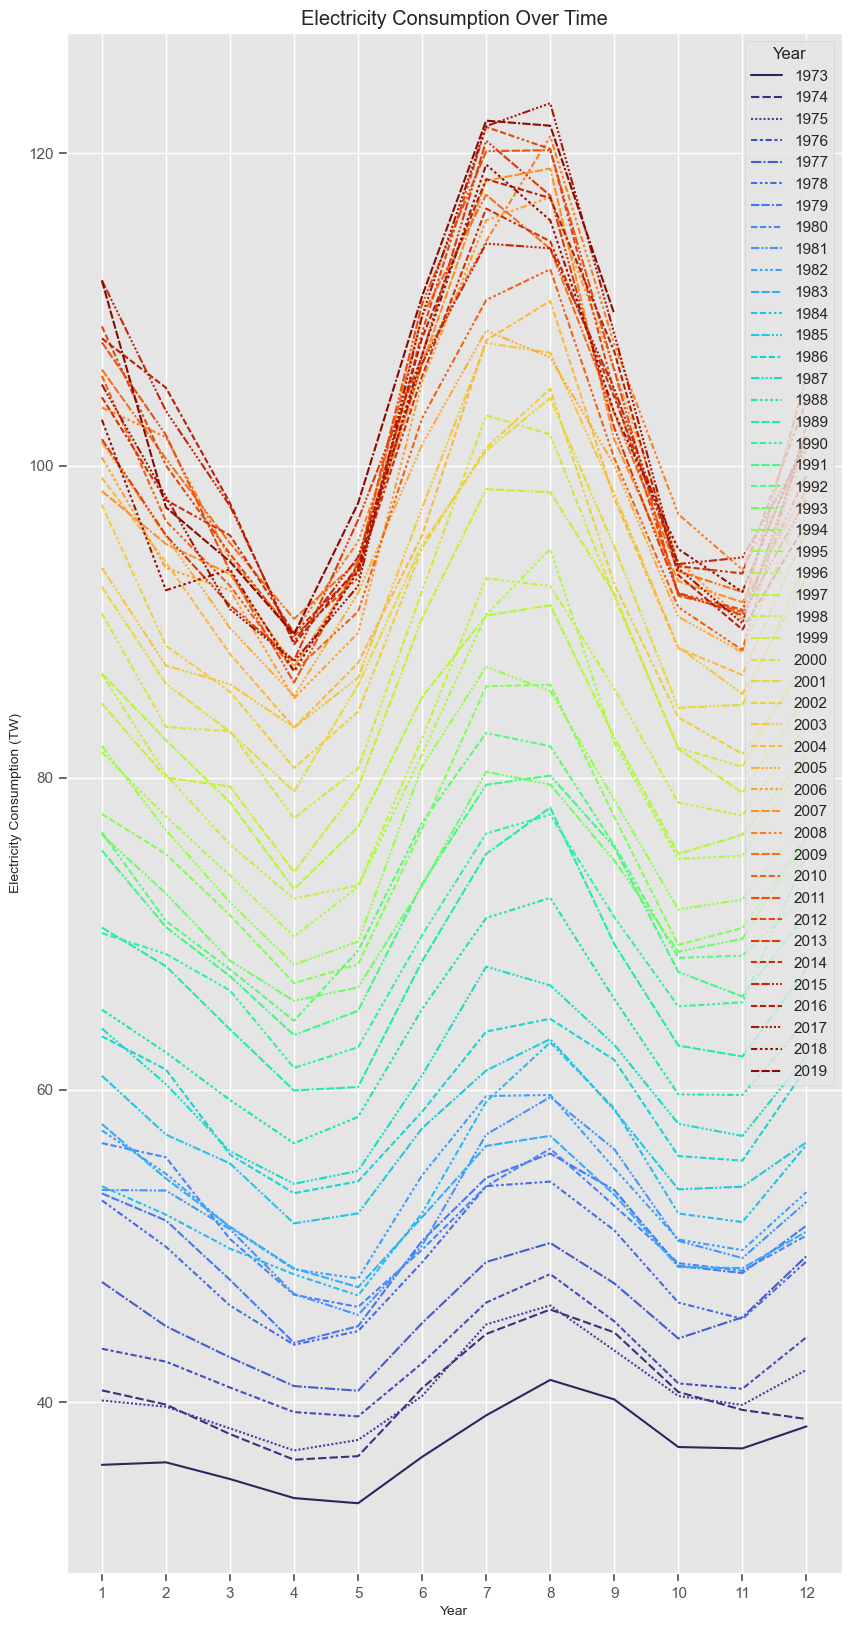

In [160]:
time_period = pd.pivot_table(data=df, index='Month', columns='Year', values='Electricty_Consumption_in_TW', aggfunc='sum')

time_period.index = time_period.index.astype(str)

plt.figure(figsize=(10, 20))
sns.lineplot(data=time_period, palette='turbo')#markers= 'o'
plt.xlabel('Year')
plt.ylabel('Electricity Consumption (TW)')
plt.title('Electricity Consumption Over Time')
plt.show()


# ETS Models

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

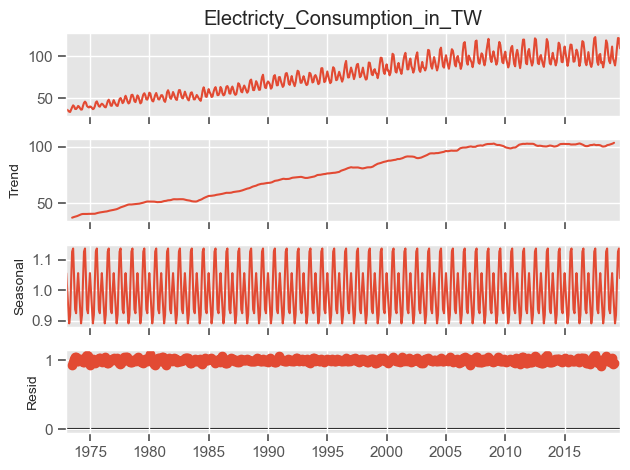

In [15]:
d = seasonal_decompose(df["Electricty_Consumption_in_TW"], model = "multiplicative")
d.plot()
plt.show()


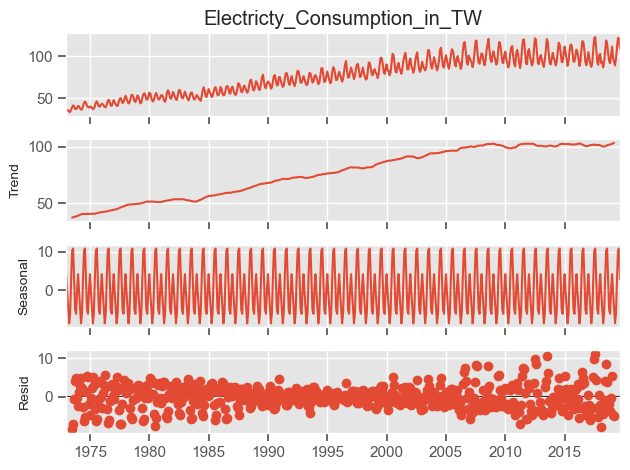

In [16]:
d = seasonal_decompose(df["Electricty_Consumption_in_TW"], model = "additive")
d.plot()
plt.show()

Augmented Dickey Fuller Test ( ADF test) for determining the stationarity in the seasonal and trends

In [7]:
from statsmodels.tsa.stattools import adfuller

In [8]:
def get_adfuller (df):
    result = pd.Series(adfuller(df)[0:4], 
          index =["Test Statistic", "p-value", "Lags Used", "Number of Observations"] )
    return result

In [9]:
df['Electricty_Consumption_in_TW'].diff().diff()

time
1973-01-01        NaN
1973-02-01        NaN
1973-03-01    -1.2315
1973-04-01    -0.1500
1973-05-01     0.8900
               ...   
2019-05-01    13.0520
2019-06-01     4.8733
2019-07-01    -2.0286
2019-08-01   -11.5683
2019-09-01   -11.7326
Name: Electricty_Consumption_in_TW, Length: 561, dtype: float64

In [10]:
# CI: 95%, p: 0.05
get_adfuller(df['Electricty_Consumption_in_TW'])

Test Statistic             -1.740593
p-value                     0.410328
Lags Used                  15.000000
Number of Observations    545.000000
dtype: float64

In [11]:
get_adfuller(df['Electricty_Consumption_in_TW'].diff().dropna())

Test Statistic           -7.941665e+00
p-value                   3.301344e-12
Lags Used                 1.400000e+01
Number of Observations    5.450000e+02
dtype: float64

In [12]:
get_adfuller(df['Electricty_Consumption_in_TW'].diff().diff().dropna())

Test Statistic           -1.200565e+01
p-value                   3.268689e-22
Lags Used                 1.800000e+01
Number of Observations    5.400000e+02
dtype: float64

In [ ]:
#Since the calculated p-value here is greater than the pre-defined p-value, the null hypothesis cannot be rejected.
#Therefore, there is no stationarity in the seasonal and trends

<Axes: xlabel='time'>

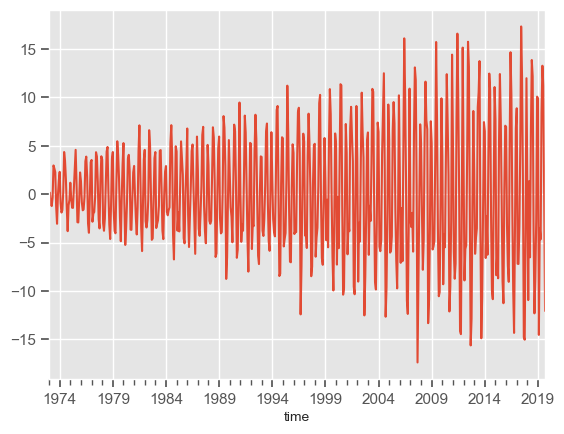

In [54]:
df['Electricty_Consumption_in_TW'].diff().plot()

Single Exponential Smoothening

In [8]:
endog_data = df['Electricty_Consumption_in_TW']

In [8]:
test= endog_data['2019-09-01':]
train= endog_data[:'2019-08-01']

In [9]:
ets_model= ExponentialSmoothing(train, seasonal='mul',trend='mul',seasonal_periods=12)
ets_model=ets_model.fit(smoothing_level=0.1,smoothing_slope=0.4,smoothing_seasonal=0.1)

In [10]:

train_pred = ets_model.fittedvalues['2017-12-01':]
train_actual= endog_data['2017-12-01':]

In [11]:
#backward testing 
print('MAPE:',np.mean(abs(train_actual-train_pred)/train_actual))
print('RMSE:',np.sqrt(np.mean(np.square(train_actual-train_pred))))
print('RMSPE:',np.sqrt(np.mean(np.square(((train_actual - train_pred) / train_actual)))))

MAPE: 0.0220815889728978
RMSE: 3.140566763769488
RMSPE: 0.03158632375834032


In [12]:
# Forward testing
pred=ets_model.forecast(steps=27)
print('MAPE:',np.mean(abs(test-pred)/test))
print('RMSE:',np.sqrt(np.mean(np.square(test-pred))))
print('RMSPE:',np.sqrt(np.mean(np.square(((test - pred) / test)))))

MAPE: 0.011140494264820486
RMSE: 1.2223238902418387
RMSPE: 0.011140494264820486


In [13]:
#final smoothening for the complete data
ets_model_final= ExponentialSmoothing(train, seasonal='mul',trend='mul',seasonal_periods=12)
ets_model_final=ets_model_final.fit(smoothing_level=0.1,smoothing_slope=0.4,smoothing_seasonal=0.1)

In [14]:
ets_model_final.forecast(steps=28)

2019-09-01    108.496676
2019-10-01     97.171452
2019-11-01     95.739323
2019-12-01    106.104958
2020-01-01    112.404725
2020-02-01    104.886964
2020-03-01    100.744682
2020-04-01     95.238096
2020-05-01    101.652067
2020-06-01    116.633491
2020-07-01    128.509861
2020-08-01    128.323688
2020-09-01    115.648420
2020-10-01    103.576674
2020-11-01    102.050143
2020-12-01    113.099047
2021-01-01    119.814074
2021-02-01    111.800767
2021-03-01    107.385439
2021-04-01    101.515877
2021-05-01    108.352636
2021-06-01    124.321586
2021-07-01    136.980808
2021-08-01    136.782362
2021-09-01    123.271582
2021-10-01    110.404107
2021-11-01    108.776953
2021-12-01    120.554164
Freq: MS, dtype: float64

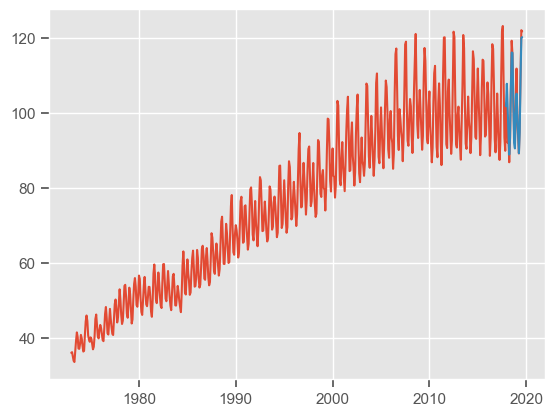

In [287]:
plt.plot(train)
plt.plot(train_pred)

ARIMA

In [25]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

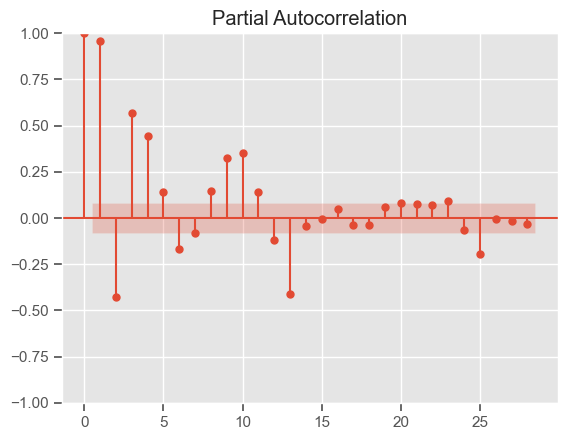

In [88]:
plot_pacf(df["Electricty_Consumption_in_TW"])
plt.show()

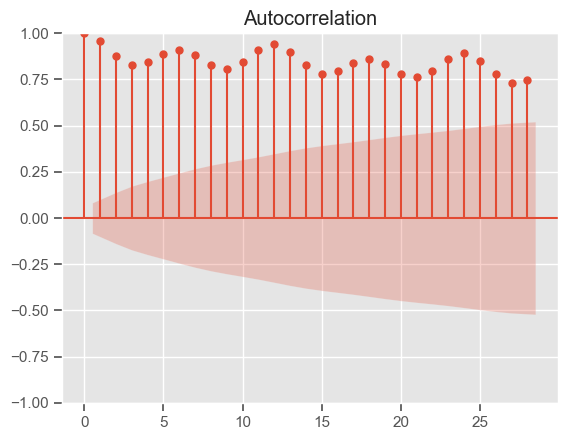

In [89]:
plot_acf(df["Electricty_Consumption_in_TW"])
plt.show()

In [255]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [256]:
model = ARIMA(endog_data, order = (3, 2, 1))
model_fit = model.fit()

In [257]:
arima_forecast = model_fit.forecast(steps = 27)

In [258]:
arima_forecast

2019-10-01     99.852586
2019-11-01    100.480144
2019-12-01    110.065211
2020-01-01    118.541954
2020-02-01    118.474121
2020-03-01    111.142420
2020-04-01    104.413849
2020-05-01    104.507989
2020-06-01    110.555775
2020-07-01    116.315466
2020-08-01    116.651721
2020-09-01    112.103223
2020-10-01    107.632557
2020-11-01    107.465636
2020-12-01    111.303548
2021-01-01    115.202416
2021-02-01    115.690235
2021-03-01    112.897996
2021-04-01    109.957070
2021-05-01    109.716528
2021-06-01    112.159615
2021-07-01    114.802694
2021-08-01    115.310518
2021-09-01    113.624951
2021-10-01    111.713707
2021-11-01    111.488790
2021-12-01    113.054781
Freq: MS, Name: predicted_mean, dtype: float64

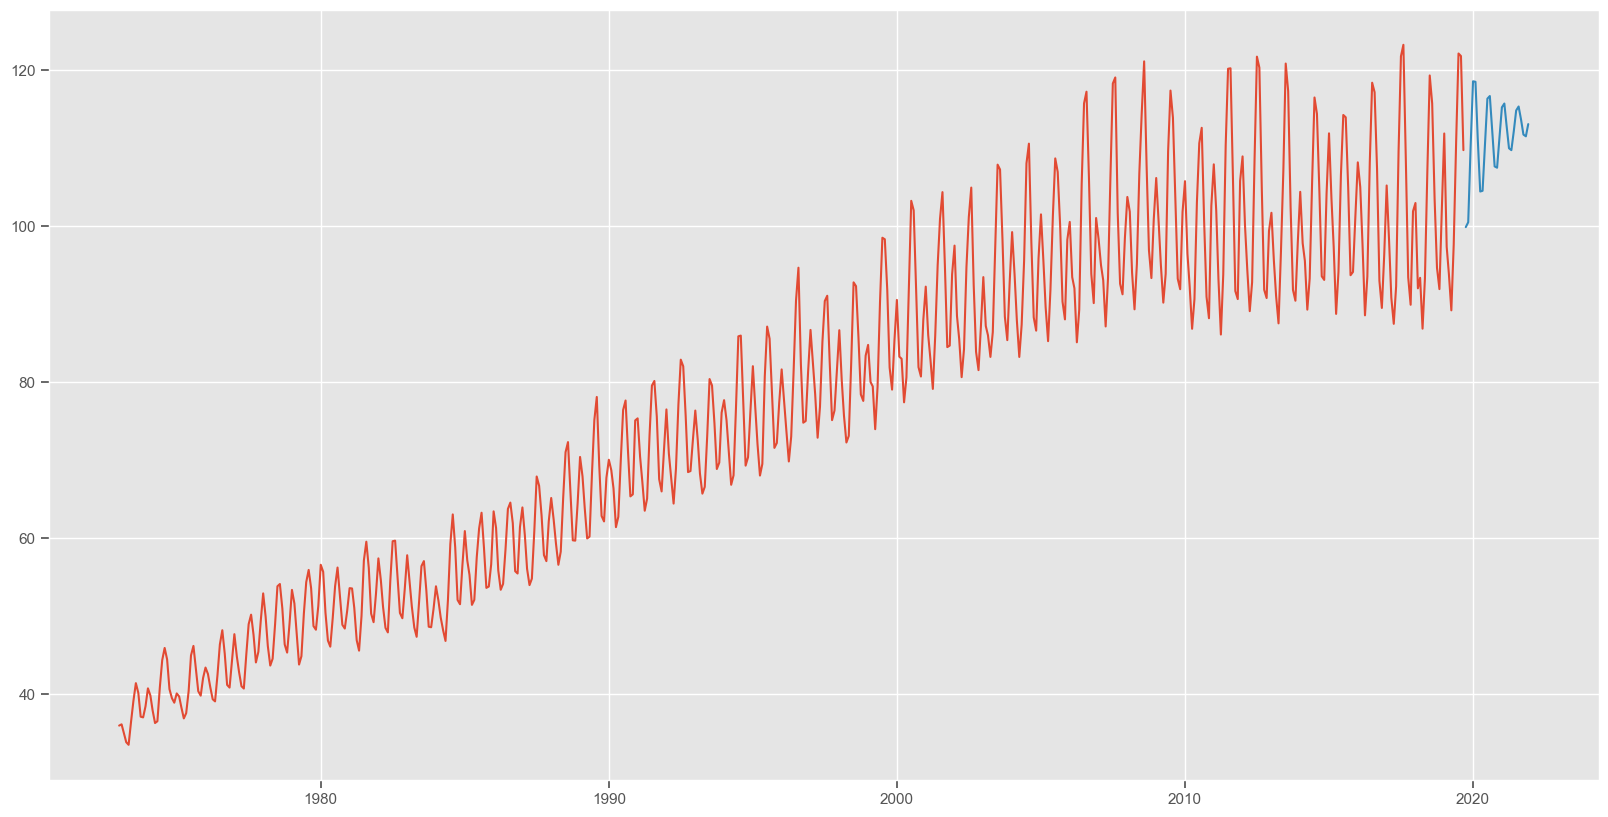

In [259]:
plt.figure(figsize=(20,10))
plt.plot(df['Electricty_Consumption_in_TW'])
plt.plot(arima_forecast)

AUTO ARIMA 

Note : This method is similar to sarimax, but here the values of p,d,q & P,D,Q,T are assigned automatically

In [166]:
import pandas as pd
from pmdarima import auto_arima

In [167]:
model = auto_arima(df['Electricty_Consumption_in_TW'], seasonal=True, m=12)

In [168]:
print(model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  561
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1139.814
Date:                              Tue, 26 Mar 2024   AIC                           2291.627
Time:                                      16:35:08   BIC                           2317.595
Sample:                                  01-01-1973   HQIC                          2301.767
                                       - 09-01-2019                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4284      0.066      6.451      0.000       0.298       0.559
ma.L1         -0.66

In [169]:
auto_arima_forecast = model.predict(n_periods=27)

In [170]:
auto_arima_forecast

2019-10-01     96.899349
2019-11-01     93.787422
2019-12-01    102.994025
2020-01-01    109.219361
2020-02-01     99.581164
2020-03-01     95.840414
2020-04-01     90.207094
2020-05-01     96.485746
2020-06-01    110.286624
2020-07-01    121.274339
2020-08-01    120.294144
2020-09-01    108.326872
2020-10-01     96.459697
2020-11-01     93.940782
2020-12-01    103.349054
2021-01-01    109.649444
2021-02-01    100.104521
2021-03-01     96.401799
2021-04-01     90.804791
2021-05-01     97.055823
2021-06-01    110.789676
2021-07-01    121.723466
2021-08-01    120.748420
2021-09-01    108.840714
2021-10-01     97.032539
2021-11-01     94.526158
2021-12-01    103.887705
Freq: MS, dtype: float64

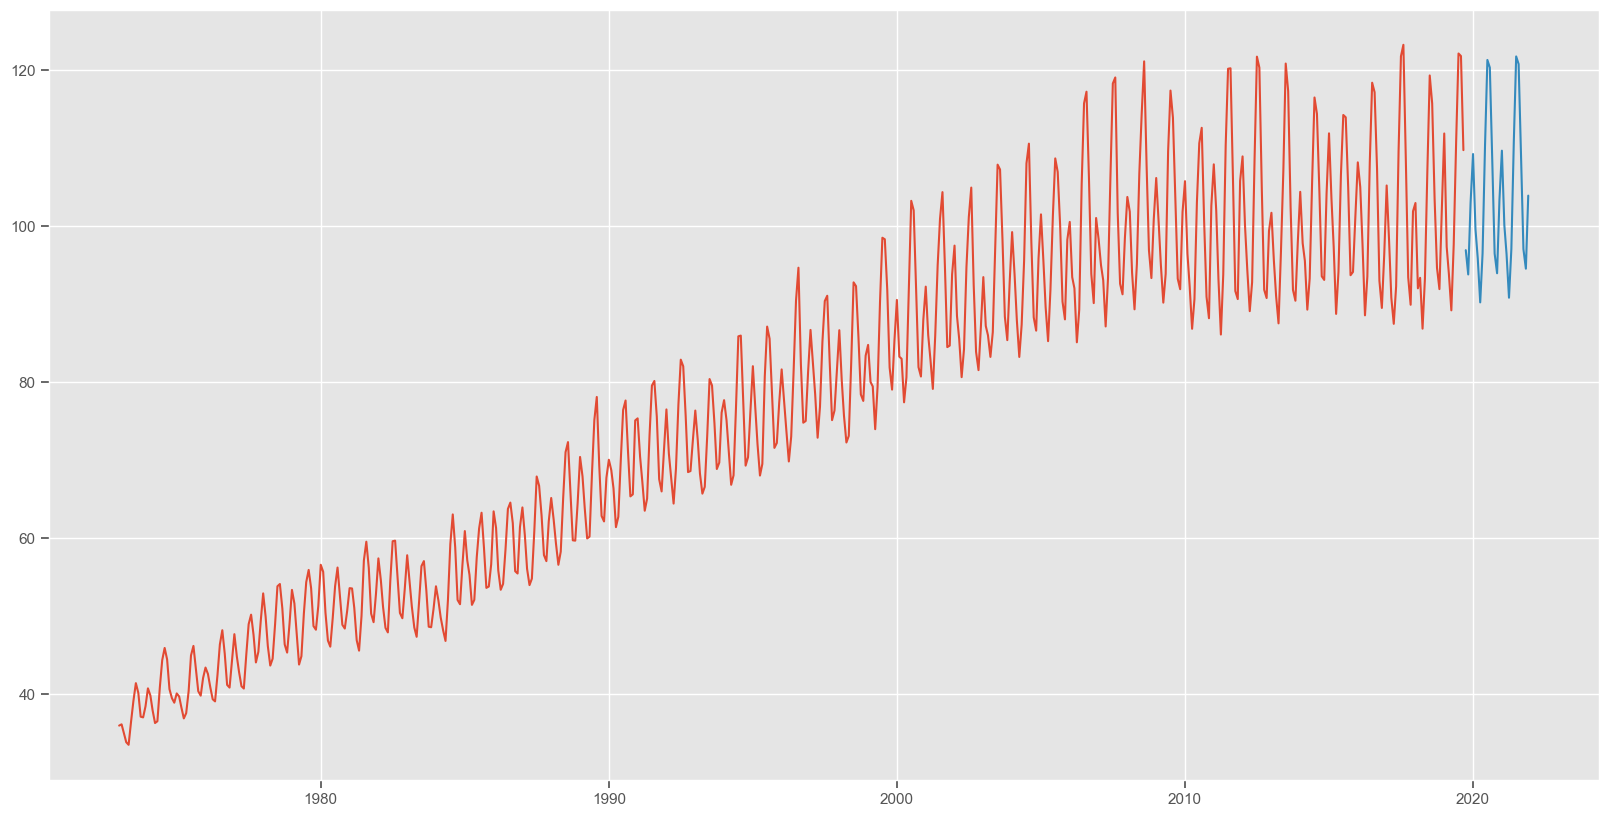

In [171]:
plt.figure(figsize=(20,10))
plt.plot(df['Electricty_Consumption_in_TW'])
plt.plot(auto_arima_forecast)

In [ ]:
#auto_arima(Sarimax) seems to make a closer prediction for the model than arima

SARIMA (Seasonal Arima Models)

Note: It is similar to auto_arima, except here we assign the p,d,q and P, D, Q, T

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats import boxcox
import statsmodels.tsa.api as sm

In [22]:
transformed_data, lambda_value = boxcox(endog_data)
print("Optimal lambda:", lambda_value)

Optimal lambda: 0.8391250471352747


In [10]:
if lambda_value != 0:
    inverse_transformed_data = (transformed_data * lambda_value + 1) ** (1 / lambda_value)
else:
    inverse_transformed_data = np.exp(transformed_data)

In [18]:
transformed_data

array([22.8979206 , 22.98813431, 22.38534359, 21.69449172, 21.50656473,
       23.18389986, 24.66613835, 25.92014658, 25.23189376, 23.53718782,
       23.48769654, 24.27358294, 25.55259751, 25.04964984, 23.99903368,
       23.0818747 , 23.21024818, 25.63210756, 27.52764328, 28.37699836,
       27.58152975, 25.49541477, 24.85941331, 24.53613567, 25.19418319,
       24.97245874, 24.20123028, 23.41445928, 23.79049892, 25.35290654,
       27.85913021, 28.51810924, 26.95269194, 25.35312717, 25.03593999,
       26.27457827, 27.0125667 , 26.56082913, 25.65109739, 24.78366512,
       24.6303225 , 26.50749785, 28.6173984 , 29.59891813, 27.96843521,
       25.79610584, 25.60634333, 27.41377692, 29.32779613, 27.79590652,
       26.71010703, 25.70243959, 25.53860698, 27.91002617, 30.01332876,
       30.66509708, 29.2789205 , 27.37114302, 28.10808176, 30.21437032,
       32.11052844, 30.53668714, 28.51249534, 27.15168965, 27.62752436,
       30.00236642, 32.59249606, 32.74463249, 31.09500258, 28.61

In [23]:
# Example random data (replace with your actual data)
train_data = np.random.rand(100) * 100  # Training data
test_data = np.random.rand(50) * 100    # Testing data


In [24]:
# Apply Box-Cox transformation to training data
transformed_train, lambda_train = boxcox(train_data)

# Apply Box-Cox transformation to testing data using the lambda from training data
transformed_test = boxcox(test_data, lmbda=lambda_train)

In [14]:
ln_train= np.log(train)
ln_test= np.log(test)

NameError: name 'train' is not defined

In [15]:
# User defined function to find the best value for parameters
import sys
import itertools
import warnings


def auto_arima(timeseries, regressors= None,p=range(0,2), d=range(1,2), q= range(0,2), P=range(0,2), D=range(1,1), Q= range(0,2), verbose=False):
    
    pdq= list(itertools.product(p,d,q))
    seasonal_pdq = [(i[0],i[1],i[2], 12) for i in pdq]
    
    best_aic= np.inf
    best_pdq= None
    best_seasonal_pdq= None
    best_results= None
    
    for parmas in pdq:
        for param_seasonal in seasonal_pdq:
            model= sm.statespace.SARIMAX(endog=timeseries, 
                                         order=parmas, 
                                         seasonal_order=param_seasonal, 
                                         exog= regressors,
                                         enforce_invertibility= False,
                                         enforce_stationarity=False)
            temp_results= model.fit()
            if verbose== True:
                print("SARIMAX{}X{}: {}".format(parmas, param_seasonal, temp_results.aic))
                
            if temp_results.aic< best_aic:
                best_aic= temp_results.aic
                best_pdq= parmas
                best_seasonal_pdq= param_seasonal
                best_results = temp_results
    print(f'Best Parameters: {best_pdq}X{best_seasonal_pdq}')

In [25]:
best_results = auto_arima(endog_data, p=range(0,2), d=range(1,2), q= range(0,2),
                          P=range(0,2), D=range(1,1), Q= range(0,2))


Best Parameters: (1, 1, 1)X(0, 1, 1, 12)


In [25]:
#SARIMA model with training data 
SARIMA_model= sm.statespace.SARIMAX(transformed_train, 
                                         order=(1, 1, 1), 
                                         seasonal_order=(0, 1, 1, 12),
                                         enforce_invertibility= False,
                                         enforce_stationarity=False).fit()

In [28]:
# Convert SARIMA fitted values back to original scale
fitted_values_series = np.exp(SARIMA_model.fittedvalues)

# Convert date to integer index
start_date = '2017-12-01'
start_index = fitted_values_series.index.get_loc(start_date)

# Slice using integer indices
sarima_train_pred = fitted_values_series[start_index:]
train_actual = endog_data[start_index:]

AttributeError: 'numpy.ndarray' object has no attribute 'index'

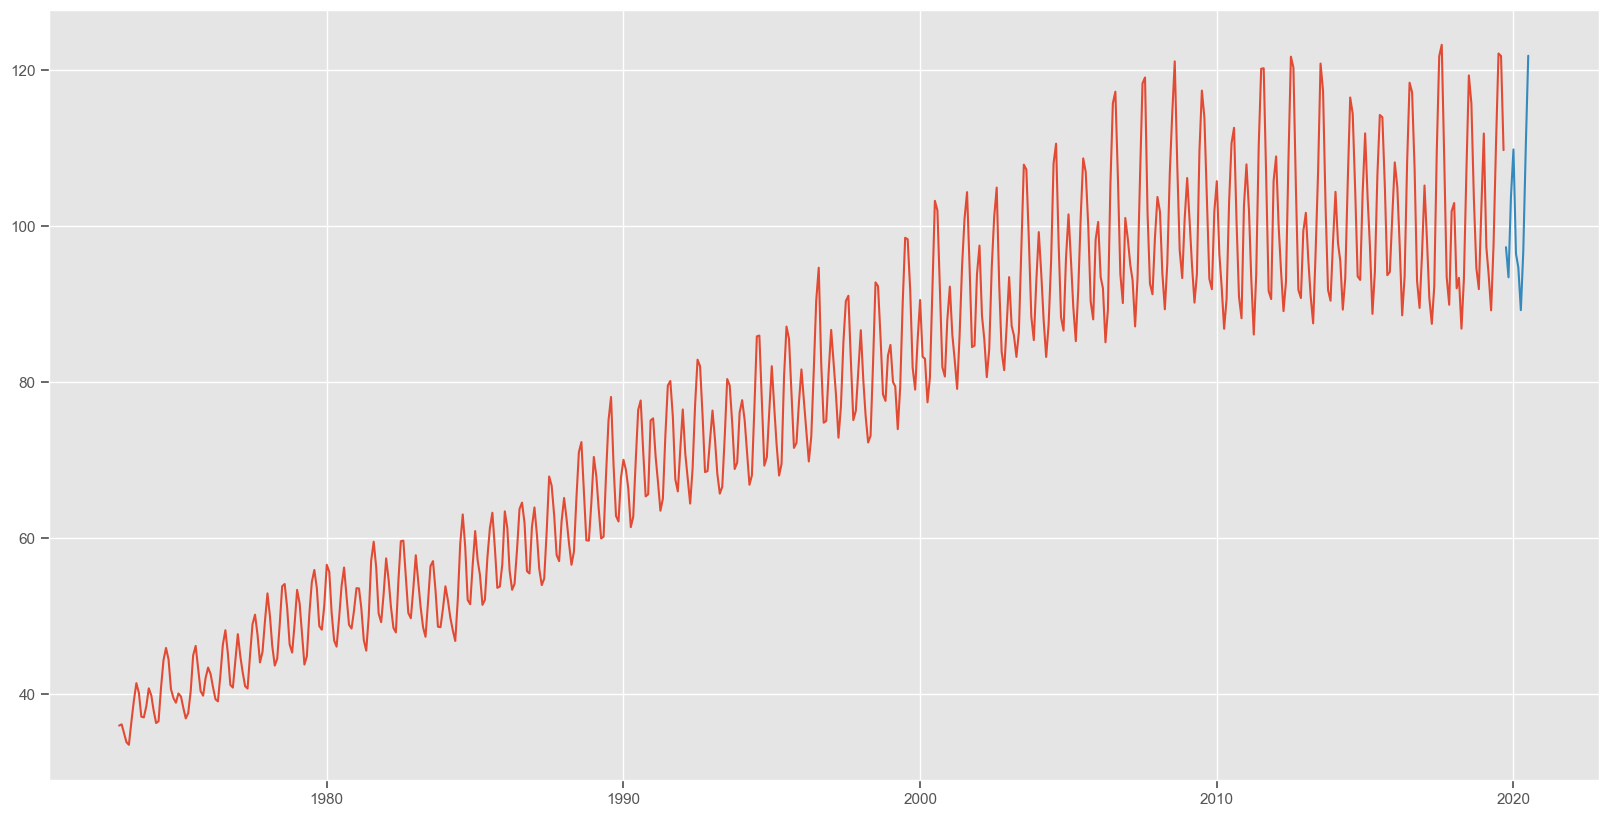

In [249]:
# Backward testing
print('MAPE:',np.mean(abs(train_actual-sarima_train_pred)/train_actual))
print('RMSE:',np.sqrt(np.mean(np.square(train_actual-sarima_train_pred))))
print('RMSPE:',np.sqrt(np.mean(np.square(((train_actual - sarima_train_pred) / train_actual)))))

MAPE: 0.021348731110483406
RMSE: 2.8446892818791363
RMSPE: 0.02871538493785819


In [250]:
# Forward testing
sarima_pred=np.exp(SARIMA_model.forecast(steps=28))
print('MAPE:',np.mean(abs(test-sarima_pred)/test))
print('RMSE:',np.sqrt(np.mean(np.square(test-sarima_pred))))
print('RMSPE:',np.sqrt(np.mean(np.square(((test - sarima_pred) / test)))))

MAPE: 0.014439156135671274
RMSE: 1.5842497720497164
RMSPE: 0.014439156135671274


In [251]:
#Final Model
Final_SARIMA_model= sm.statespace.SARIMAX(ln_endog_data, 
                                         order=(1, 1, 1), 
                                         seasonal_order=(1, 0, 1, 12),
                                         enforce_invertibility= False,
                                         enforce_stationarity=False).fit()

In [252]:
predict = np.exp(SARIMA_model.forecast(steps=28))
predict

2019-09-01    108.134750
2019-10-01     95.377446
2019-11-01     93.011813
2019-12-01    103.161241
2020-01-01    109.373291
2020-02-01    100.244289
2020-03-01     95.770364
2020-04-01     89.621788
2020-05-01     95.905253
2020-06-01    110.644914
2020-07-01    122.261836
2020-08-01    121.446937
2020-09-01    108.150794
2020-10-01     95.519910
2020-11-01     93.264825
2020-12-01    103.614646
2021-01-01    109.962166
2021-02-01    100.749048
2021-03-01     96.237895
2021-04-01     90.024180
2021-05-01     96.393535
2021-06-01    111.336249
2021-07-01    123.124147
2021-08-01    122.299295
2021-09-01    108.813479
2021-10-01     96.013667
2021-11-01     93.729997
2021-12-01    104.216380
Freq: MS, Name: predicted_mean, dtype: float64

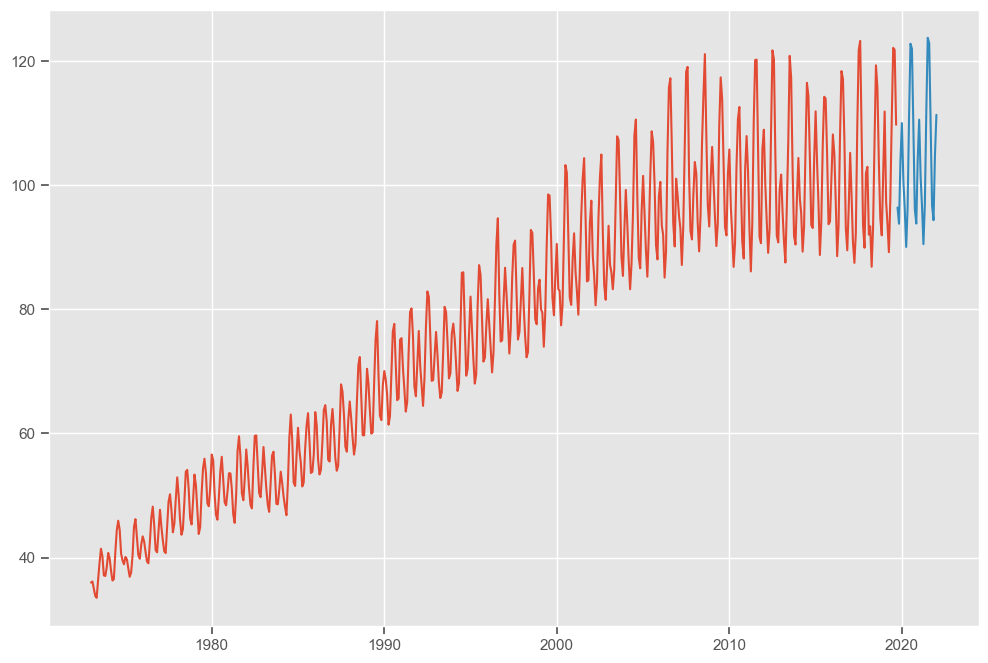

In [254]:
plt.figure(figsize=(12,8))
plt.plot(endog_data)
plt.plot(np.exp(Final_SARIMA_model.forecast(steps=28)))

Comparison between Arima and Sarima models

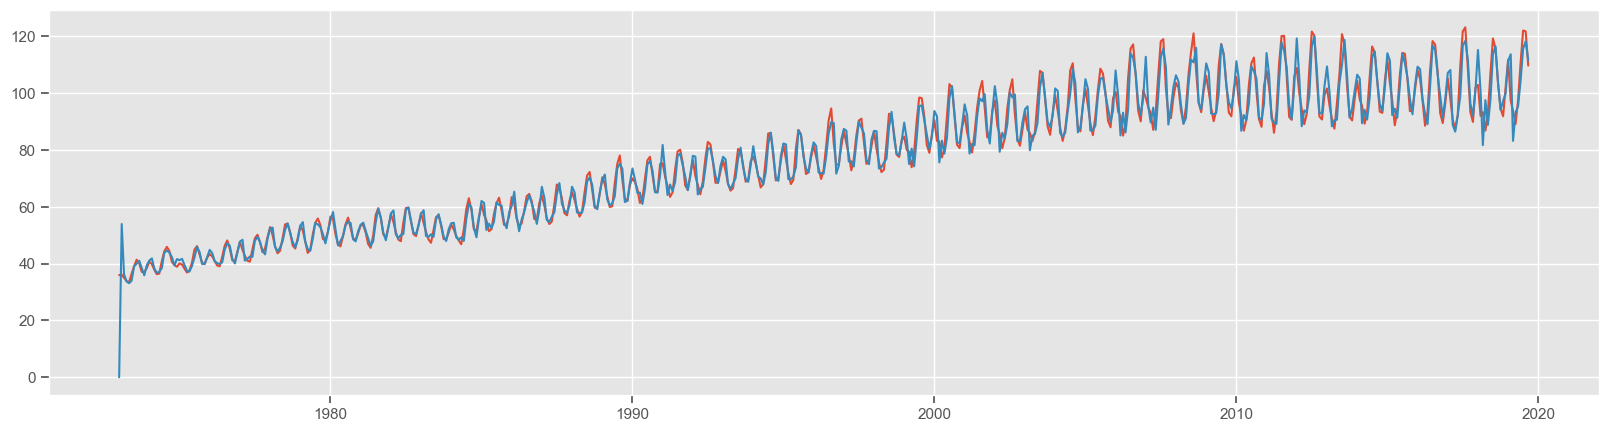

In [268]:
model = ARIMA(df, order = (3,2, 1))
model_fit = model.fit()

arima_preds = model_fit.predict()


plt.figure(figsize=(20, 5))
plt.plot(df)
plt.plot(endog_data.index, arima_preds.values)

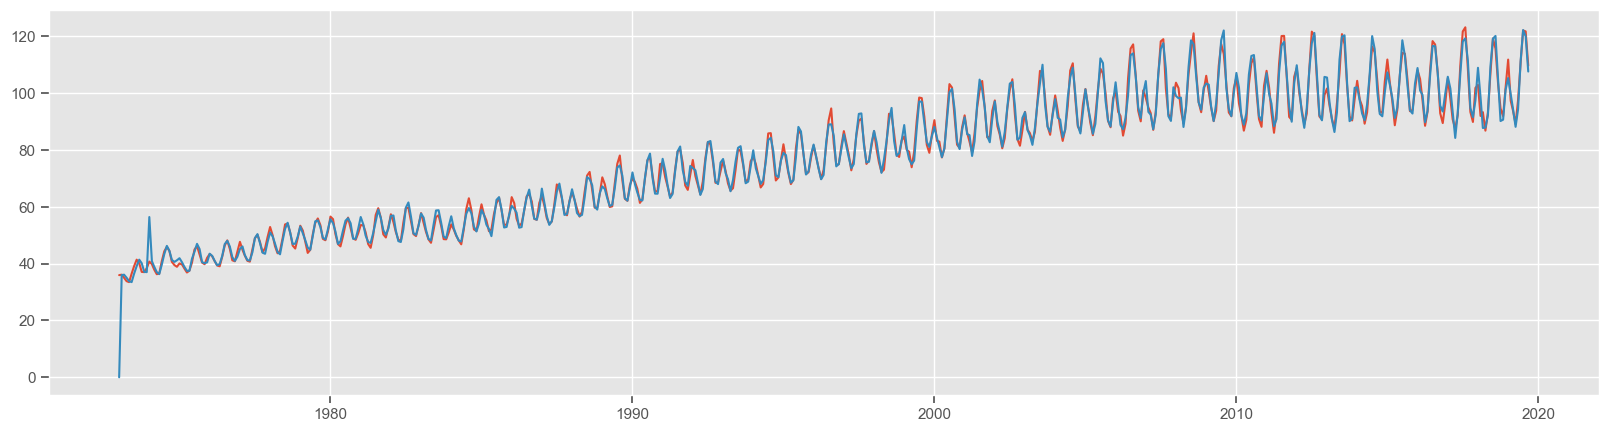

In [270]:
model = SARIMAX(endog_data, order =order, seasonal_order = seasonal_order)


model_fit = model.fit(disp=False)
sarima_preds = model_fit.predict()

plt.figure(figsize=(20, 5))
plt.plot(df)
plt.plot(endog_data.index, sarima_preds.values)

In [272]:
forecast_df = pd.DataFrame(model_fit.forecast(steps = 28))

In [273]:
forecast_df.columns = ["Total"]

In [274]:
new_df = pd.concat([df, forecast_df], axis = 'rows')
new_df

,Electricty_Consumption_in_TW,Total
1973-01-01,35.9728,NaN
1973-02-01,36.1334,NaN
1973-03-01,35.0625,NaN
1973-04-01,33.8416,NaN
1973-05-01,33.5107,NaN
...,...,...
2021-09-01,NaN,109.450766
2021-10-01,NaN,97.881681
2021-11-01,NaN,94.282647
2021-12-01,NaN,104.515467


In [275]:
new_df.isna().sum()

Electricty_Consumption_in_TW     28
Total                           561
dtype: int64

In [276]:
new_df.index = pd.to_datetime(new_df.index)

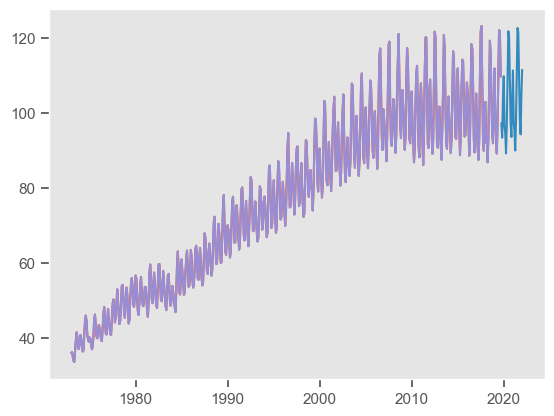

In [277]:
plt.plot(new_df.index,new_df.values)
plt.plot(df.index, df.values)
plt.grid()
